### Upload Image to EDA

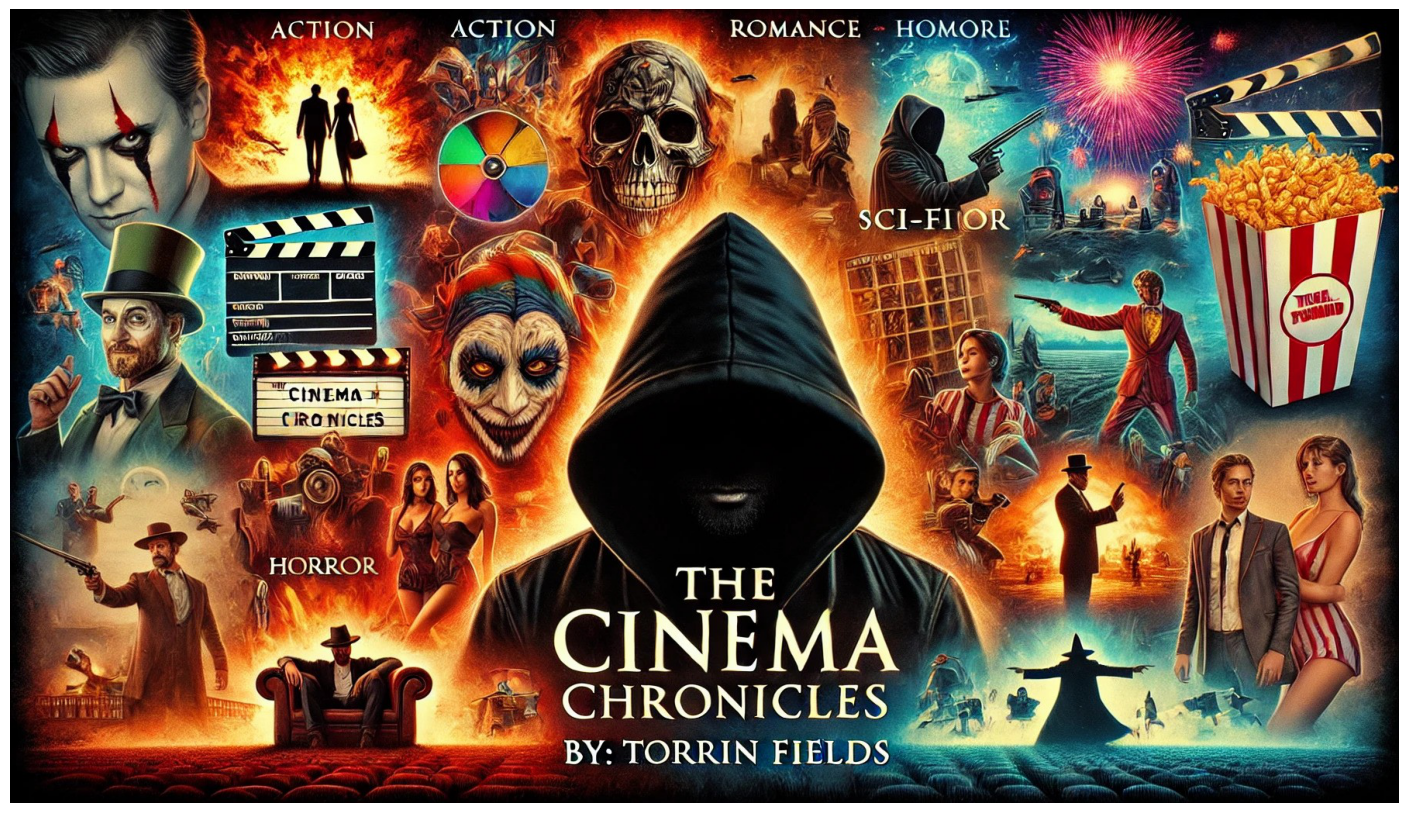

In [314]:


import imageio.v3 as iio
import matplotlib.pyplot as plt

# Load the HEIC image
image = iio.imread('/Users/xTRUxDesigns/Desktop/cookie.jpeg')

# Display the image using matplotlib
plt.figure(figsize=(image.shape[1] / 100, image.shape[0] / 5))  # Set the figure size to twice the image dimensions
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

### Install and Import Libraries

In [294]:
!pip install pillow pyheif


  Using cached pyheif-0.7.1.tar.gz (22 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      /opt/anaconda3/lib/python3.11/site-packages/setuptools/__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-

In [696]:
!pip install imageio "imageio[heif]"


In [704]:
sudo aptget install libheif-dev


SyntaxError: invalid syntax (3048976502.py, line 1)

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # splits data into training a machine learning model and testing
from sklearn.linear_model import LinearRegression # used for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # used to evaluate the performance of a regression model
import plotly.express as px # generates interactive plots
import plotly.graph_objects as go # offers more control and flexibility for building complex and highly customized visualizations.
from textblob import TextBlob #  It provides a consistent API for diving into common natural language processing
import requests # is a simple and elegant HTTP library for making HTTP requests. It abstracts the complexities of making requests behind a simple API
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # library is a powerful suite of libraries and programs for symbolic and statistical natural language processing
import spacy #  is a powerful and fast library for advanced natural language processing (NLP)
import scrapy
import scipy.stats as stats
import statsmodels.api as sm
import zipfile #  module in Python provides tools for working with ZIP files,
import os # module in Python provides a way of using operating system-dependent functionality like reading or writing to the file system
import ipywidgets as widgets # import widgets for displaying data
from IPython.display import display
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from wordcloud import WordCloud
from wordcloud import WordCloud


In [299]:
pip install pandas wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [300]:
!pip install wordcloud


In [301]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [302]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


In [303]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [304]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [305]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


### Upload CSV

In [306]:
# Full path to the CSV file
file_path = '/Users/xTRUxDesigns/Desktop/archive (1)/credits.csv'

In [307]:
credits_df = pd.read_csv(file_path)

In [308]:
credits_df.head(3)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602

---
---
---

### PROBLEM: 

Our dataset is combined JSONified dictionaries representing connected occurrences of casts and crews for specific productions.

Each production is identified by the outermost `id` feature.

In [311]:
all_casts, all_crews = pd.DataFrame(), pd.DataFrame()

# Loop through first three credits data objects.
for index, production in credits_df.iterrows():
    # Create new DFs for unpacked cast and crew data.
    new_casts = pd.DataFrame(eval(production["cast"]))
    new_crews = pd.DataFrame(eval(production["crew"]))
    
    # Add new column to new cast/crew DFs with parent ID to link them together.
    new_casts["production_id"] = production["id"]
    new_crews["production_id"] = production["id"]
    
    # Rename annoying columns for better clarity.
    new_casts.rename(columns={"id": "actor_id", "credit_id": "credit_address", "cast_id": "character_id"}, 
                     inplace=True)
    new_crews.rename(columns={"id": "crew_id", "credit_id": "credit_address"},
                     inplace=True)
    
    # Convert each cast to DataFrame and add to preexisting mega-DF for casts.
    all_casts = pd.concat([all_casts, new_casts], ignore_index=True)
    
    # Convert each crew to DataFrame and add to preexisting mega-DF for crews.
    all_crews = pd.concat([all_crews, new_crews], ignore_index=True)

KeyboardInterrupt: 

In [ ]:
all_casts

In [ ]:
all_crews.head(3)

In [ ]:
first_jsonified_casts = credits_df["cast"].iloc[0]

In [ ]:
first_jsonified_crews = credits_df["crew"].iloc[0]

In [ ]:
# Initial Creation of Casts DF
casts_df = pd.DataFrame(eval(first_jsonified_casts))

# Extend Casts DF with New Data
for cast in credits_df["cast"].iloc[1:21]:
    # casts_df.append(pd.DataFrame(eval(cast)))
    casts_df = pd.concat([casts_df, pd.DataFrame(eval(cast))], ignore_index=True)

In [ ]:
casts_df

In [ ]:
sample_crews.head(3)

In [ ]:
sample_casts = pd.DataFrame(eval(sample_jsonified_casts))

# len(sample_casts), len(sample_casts["credit_id"].unique())
# set(sample_casts["credit_id"])

In [ ]:
set(sample_crews["credit_id"]).intersection(set(sample_casts["credit_id"]))

In [ ]:
sample_crews = pd.DataFrame(eval(sample_jsonified_crews))

# len(sample_crews), len(sample_crews["credit_id"].unique())
# set(sample_crews["credit_id"])

---
---
---

### Data Has Now been Converted to Readable CSV files we will Upload the new csv

In [321]:
all_casts = pd.read_csv("all_casts.csv")
all_crews = pd.read_csv("all_crews.csv")

In [323]:
null_counts = all_casts.isnull().sum()
print(null_counts)

character_id           0
character          25783
credit_address         0
gender                 0
actor_id               0
name                   0
order                  0
profile_path      173856
production_id          0
dtype: int64


In [325]:
more_null = all_crews.isnull().sum()
print(more_null)

credit_address         0
department             0
gender                 0
crew_id                0
job                    0
name                   0
profile_path      369216
production_id          0
dtype: int64


### Added a Natural Language Processer to Help find information in Data on Specific Actors Or Directors

In [327]:
def search_in_dataframe(query, df, column_name):
    """ Search for a query in a specific column of a DataFrame using fuzzy matching. """
    choices = df[column_name].dropna().unique()
    best_match = process.extractOne(query, choices, scorer=fuzz.partial_ratio)
    if best_match:
        matched_string, score = best_match
        print(f"Best match for '{query}' in column '{column_name}': '{matched_string}' with score {score}")
        return df[df[column_name].str.contains(matched_string, case=False, na=False)]
    return pd.DataFrame()

def search_by_actor_name(name, df=all_casts):
    return search_in_dataframe(name, df, 'name')

def search_by_character_name(character, df=all_casts):
    return search_in_dataframe(character, df, 'character')

def search_by_production_id(production_id, casts_df=all_casts, crews_df=all_crews):
    cast_results = casts_df[casts_df['production_id'] == production_id]
    crew_results = crews_df[crews_df['production_id'] == production_id]

### Tested out The NLP

In [330]:
#NLP for searching dataset commands are
#search_in_dataframe(query, df, column_name): searches column of a DataFrame to find the best match for the query.
#search_by_actor_name(name, df=all_casts): search for any actor
#search_by_character_name(character, df=all_casts):This function searches for a character's name in the all_casts
#search_by_production_id(production_id, casts_df=all_casts, crews_df=all_crews): earches for entries by production_id in both all_casts and all_crews 
search_by_actor_name("Bruce Willis")

Best match for 'Bruce Willis' in column 'name': 'Bruce Willis' with score 100


character_id                character            credit_address  \
397             43.0                      Leo  52fe420dc3a36847f80001bb   
622             41.0               James Cole  52fe4212c3a36847f8001b31   
2721             8.0             John McClane  52fe42ffc3a36847f803297b   
4628             9.0             Carl Roebuck  52fe44629251416c75032de9   
4880             1.0           Butch Coolidge  52fe4269c3a36847f801ca95   
...              ...                      ...                       ...   
492175           3.0                    Eddie  56d0a4fac3a3681e50005f5f   
503853           4.0                   Hubert  55f3a027c3a3686d27001973   
525655         113.0  David Dunn (uncredited)  5886b433925141197d000ae5   
556570           3.0                    Steve  558904d8c3a3683d500014eb   
560804           0.0             Police Chief  57a912dbc3a36826c600be27   

        gender  actor_id          name  order  \
397        2.0      62.0  Bruce Willis    5.0   
622        2.0      62.0  Bruce Willis    0.0   
2721       2.0      62.0  Bruce Willis    0.0   
4628       2.0      62.0  Bruce Willis    1.0   
4880       2.0      62.0  Bruce Willis    3.0   
...        ...       ...           ...    ...   
492175     2.0      62.0  Bruce Willis    1.0   
503853     2.0      62.0  Bruce Willis    1.0   
525655     2.0      62.0  Bruce Willis   11.0   
556570     2.0      62.0  Bruce Willis    0.0   
560804     2.0      62.0  Bruce Willis    1.0   

                            profile_path  production_id  
397     /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg              5  
622     /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg             63  
2721    /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg           1572  
4628    /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg          11593  
4880    /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg            680  
...                                  ...            ...  
492175  /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg         384737  
503853  /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg         359412  
525655  /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg         381288  
556570  /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg         345915  
560804  /2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg         410554  

[91 rows x 9 columns]

### Uploaded Keywords CSV


In [233]:
file_path1 = '/Users/xTRUxDesigns/Desktop/archive (1)/keywords.csv'

In [234]:
keywords_df = pd.read_csv(file_path1)

### Dataset is combined JSONified dictionaries so were going to fix that

In [235]:
keywords_df.head

<bound method NDFrame.head of            id                                           keywords
0         862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2       15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3       31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4       11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
...       ...                                                ...
46414  439050             [{'id': 10703, 'name': 'tragic love'}]
46415  111109  [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416   67758                                                 []
46417  227506                                                 []
46418  461257                                                 []

[46419 rows x 2 columns]>

In [236]:

all_keywords = pd.DataFrame()

# Loop through first three credits data objects.
for index, production in keywords_df.iterrows():
    # Create new DFs for unpacked cast and crew data.
    new_keywords = pd.DataFrame(eval(production["keywords"]))
   
    
    # Add new column to new cast/crew DFs with parent ID to link them together.
    new_keywords["production_id"] = production["id"]
    
    
    # Convert each cast to DataFrame and add to preexisting mega-DF for casts.
    all_keywords = pd.concat([all_keywords, new_keywords], ignore_index=True)
    


### Fixed data and Exported it now We will upload it

In [237]:
all_keywords = pd.read_csv("all_keywords.csv")

In [238]:
all_keywords

id          name  production_id
0          931.0      jealousy            862
1         4290.0           toy            862
2         5202.0           boy            862
3         6054.0    friendship            862
4         9713.0       friends            862
...          ...           ...            ...
158675   11800.0  mockumentary         289923
158676   10703.0   tragic love         439050
158677    2679.0        artist         111109
158678   14531.0          play         111109
158679  215397.0         pinoy         111109

[158680 rows x 3 columns]

### Checked Data For null Values

In [239]:
nulls = all_keywords.isnull().sum()
print(nulls)

id               0
name             0
production_id    0
dtype: int64


### Uploaded Links_small CSV next

In [240]:
file_path2 = '/Users/xTRUxDesigns/Desktop/archive (1)/links_small.csv'

In [241]:
links_small_df = pd.read_csv(file_path2)

### Viewed the Data

In [242]:
links_small_df.head(3)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0

### Check for null values

In [347]:
nulling = links_small_df.isnull().sum()
print(nulling)

movieId    0
imdbId     0
tmdbId     0
dtype: int64


### Checked for unique values to understand the Variety of Data

In [345]:
links_small_df['tmdbId'].unique()

array([   862.,   8844.,  15602., ..., 391698., 137608., 410803.])

### Found the median of the data

In [245]:
tmdbId_median = links_small_df['tmdbId'].median()
tmdbId_median 

15852.0

### Fill in the null values with Median

In [352]:
# fill in null values in the tmdbId median
links_small_df['tmdbId'].fillna(tmdbId_median, inplace=True)

### Check for Null Values again

In [355]:
nulling1 = links_small_df.isnull().sum()
print(nulling1)

movieId    0
imdbId     0
tmdbId     0
dtype: int64


### Uploaded links CSV

In [358]:
file_path3 = '/Users/xTRUxDesigns/Desktop/archive (1)/links.csv'

In [360]:
links = pd.read_csv(file_path3)

### Viewed top 3 Files in csv

In [363]:
links.head(3)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0

### Check for null values

In [368]:
null_mas = links.isnull().sum()
null_mas

movieId      0
imdbId       0
tmdbId     219
dtype: int64

### Found median of Data

In [252]:
links_median = links['tmdbId'].median()
links_median

60178.0

### Filled Null Value with the median of the data

In [253]:
links['tmdbId'].fillna(links_median, inplace=True)

In [254]:
null_mas1 = links.isnull().sum()
null_mas1

movieId    0
imdbId     0
tmdbId     0
dtype: int64

### Uploaded Ratings CSV

In [255]:
file_path4 = '/Users/xTRUxDesigns/Desktop/archive (1)/ratings.csv'

In [256]:
ratings = pd.read_csv(file_path4)

### View First three files in Data

In [257]:
ratings.head(3)

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523

### Check for null Values

In [258]:
nulled = ratings.isnull().sum()
nulled

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Upload Ratings Small CSV

In [259]:
file_path5 = '/Users/xTRUxDesigns/Desktop/archive (1)/ratings_small.csv'

In [261]:
ratings_small = pd.read_csv(file_path5)

### View first 3 lines in Data

In [265]:
ratings_small.head(3)

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182

### Check for null values

In [379]:
nulltron = ratings_small.isnull().sum()
nulltron

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Upload Movies Meta Csv

In [382]:
file_path6 = '/Users/xTRUxDesigns/Desktop/archive (1)/movies_metadata.csv'

In [384]:
movies_meta = pd.read_csv(file_path6)

/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_52170/2557828129.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_meta = pd.read_csv(file_path6)


### View First three lines of data

In [386]:
movies_meta.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [456]:
#dropping belongs to column it does the same thing as original_title_column and the id doesnt correlate with any other id so drop
movies_meta = movies_meta.drop(columns=['belongs_to_collection'])

In [458]:
movies_meta = movies_meta.drop(columns=['homepage'])

In [460]:
movies_meta = movies_meta.drop(columns=['spoken_languages'])

### Upload CSV

In [407]:
file_path22 = '/Users/xTRUxDesigns/Desktop/super_genre (1).csv'

In [409]:
super_genre = pd.read_csv(file_path22)

### View CSV

In [411]:
super_genre

id       name production_id
0         16.0  Animation           862
1         35.0     Comedy           862
2      10751.0     Family           862
3         12.0  Adventure          8844
4         14.0    Fantasy          8844
...        ...        ...           ...
91101  10751.0     Family        439050
91102     18.0      Drama        111109
91103     28.0     Action         67758
91104     18.0      Drama         67758
91105     53.0   Thriller         67758

[91106 rows x 3 columns]

### Check for null Values

In [413]:
nulltoppolis = super_genre.isnull().sum()
nulltoppolis

id               0
name             0
production_id    0
dtype: int64

### Drop some Columns

In [ ]:
movies_meta = movies_meta.drop(columns=['production_countries'])

In [ ]:
movies_meta = movies_meta.drop(columns=['production_companies'])

### View Dataframe after columns are dropped

In [419]:
movies_meta

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

### Check for null data

In [423]:
nullmatrix = movies_meta.isnull().sum()
nullmatrix

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Lets Clean the Original Language Column

In [432]:
#lets clean up the original language null
# List of valid ISO 639-1 language codes
valid_language_codes = [
    'en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru', 'sv', 'ja', 
    'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy', 'vi', 'cs', 'da', 'no', 
    'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo', 'ca', 'fi', 'th', 'sk', 'bs', 'hi', 
    'tr', 'is', 'ps', 'ab', 'eo', 'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 
    'ku', 'fy', 'lv', 'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 
    'ms', 'sq', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay', 'kn', 'eu', 
    'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu', 'lb', 'si'
]

In [434]:
# Replace invalid language codes with NaN
movies_meta.loc[~movies_meta['original_language'].isin(valid_language_codes), 'original_language'] = pd.NA


In [436]:
# Check the unique values again after replacement
updated_unique_languages = movies_meta['original_language'].unique()
updated_unique_languages_count = len(updated_unique_languages)

In [438]:
updated_unique_languages_count, updated_unique_languages


(90,
 array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
        'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
        'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
        'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
        'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
        'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
        'sq', <NA>, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
        'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
        'lb', 'si'], dtype=object))

In [440]:
#identify the most frequent language
most_often_language = movies_meta['original_language'].mode()[0]
#fill nan values in the 'original language with most frequently used
movies_meta['original_language'] = movies_meta['original_language'].fillna(most_often_language)
na_counts_after_filling_language = movies_meta['original_language'].isna().sum()
most_often_language, na_counts_after_filling_language                                                                           

('en', 0)

#### Clean Popularity Column

In [446]:
# Step 1: Convert the 'popularity' column to numeric, coercing errors to NaN
movies_meta['popularity'] = pd.to_numeric(movies_meta['popularity'], errors='coerce')

In [450]:
# Step 2: Calculate the median value of the 'popularity' column
median_value = movies_meta['popularity'].median()

In [452]:
movies_meta.loc[movies_meta['popularity'].isna(), 'popularity'] = median_value


In [454]:
movies_meta

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ...  release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...    1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...    1995-12-15   
2      A family wedding reignites the ancient feud be...  ...    1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...    1995-12-22   
4      Just when George Banks has recovered from his ...  ...    1995-02-10   
...                                                  ...  ...           ...   
45461        Rising and falling between a man and woman.  ...           NaN   
45462  An artist struggles to finish his work while a...  ...    2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...    2003-08-01   
45464  In a small town live two brothers, one a minis...  ...    1917-10-21   
45465  50 years after decr

### Getting rid of the null Value in Release Date Column

In [469]:
#lets get rid of the null in release date
#Apply Forward Fill and Backward Fill
movies_meta['release_date'] = movies_meta['release_date'].ffill().bfill()



### Clean runtime column

In [472]:
# Step 2: Calculate the median value 
median_value1 = movies_meta['runtime'].median()

In [474]:
movies_meta.loc[movies_meta['runtime'].isna(), 'runtime'] = median_value1


### Clean Status Column With Replace null value with Mode

In [480]:

mode_value2 = movies_meta['status'].mode()

In [483]:
movies_meta.loc[movies_meta['status'].isna(), 'status'] = mode_value2


### Clean Tagline Column

In [488]:
movies_meta['tagline'] = movies_meta['tagline'].fillna('no tagline available')

### Drop more Columns

In [ ]:
movies_meta = movies_meta.drop(columns=['title'])

In [ ]:
movies_meta = movies_meta.drop(columns=['video'])

### Check For more Null Data

In [494]:
nullmatters = movies_meta.isnull().sum()
nullmatters

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language         0
original_title            0
overview                954
popularity                0
poster_path             386
production_companies      3
production_countries      3
release_date              0
revenue                   6
runtime                   0
status                   87
tagline                   0
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

### Convert Necessary Columns to numeric

In [499]:
# Convert necessary columns to numeric values
movies_meta['budget'] = pd.to_numeric(movies_meta['budget'], errors='coerce')
movies_meta['revenue'] = pd.to_numeric(movies_meta['revenue'], errors='coerce')
movies_meta['vote_average'] = pd.to_numeric(movies_meta['vote_average'], errors='coerce')
movies_meta['vote_count'] = pd.to_numeric(movies_meta['vote_count'], errors='coerce')


### Distribution of Movie Metrics Violin Plot

/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_52170/440884299.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{np.expm1(tick):,.0f}' for tick in ticks])
/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_52170/440884299.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{np.expm1(tick):,.0f}' for tick in ticks])
/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_52170/440884299.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{np.expm1(tick):,.0f}' for tick in ticks])


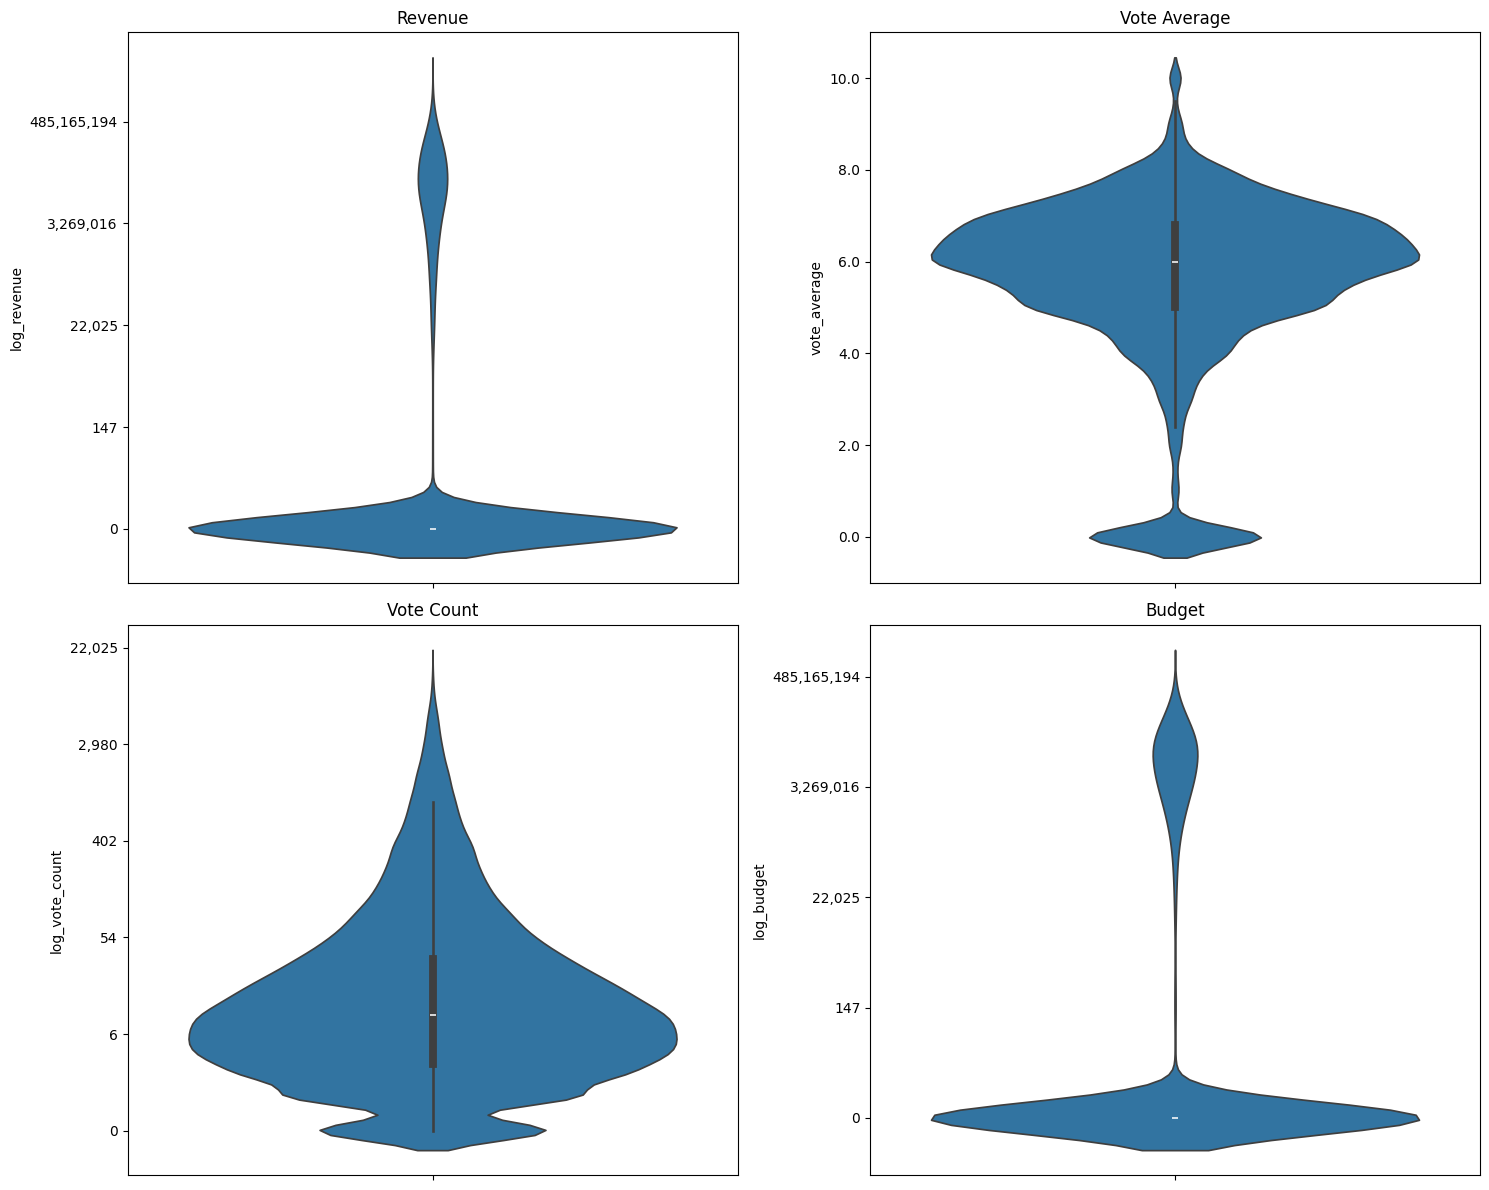

In [501]:
import matplotlib.ticker as ticker  # Ensure ticker is imported

# Create df for the relevant columns
violin_data = movies_meta[['revenue', 'vote_average', 'vote_count', 'budget']].dropna()

# Apply logarithmic scale to the relevant columns to handle lack of symmetry
violin_data['log_revenue'] = np.log1p(violin_data['revenue'])
violin_data['log_vote_count'] = np.log1p(violin_data['vote_count'])
violin_data['log_budget'] = np.log1p(violin_data['budget'])

# Create separate violin plots for each metric using log scales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['log_revenue', 'vote_average', 'log_vote_count', 'log_budget']
titles = ['Revenue', 'Vote Average', 'Vote Count', 'Budget']

for i, ax in enumerate(axes.flatten()):
    sns.violinplot(y=violin_data[metrics[i]], ax=ax)
    ax.set_title(titles[i])
    if metrics[i] != 'vote_average':
        # Transform the ticks back to the original scale
        ticks = ax.get_yticks()
        ax.set_yticklabels([f'{np.expm1(tick):,.0f}' for tick in ticks])
    else:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1f}'))

plt.tight_layout()
plt.show()

### Revenue:
The distribution is more spread out, showing that while most movies have lower revenues, there are still a significant number of movies with moderately high revenues.
The density at the lower end is clearer, indicating many movies fall into this range.
### Vote Average:
The distribution remains centered around the middle range, with most movies having average ratings between 5 and 7.
The density is highest around the mean, showing that extreme ratings are less common.
### Vote Count:
The distribution reveals that while many movies have relatively few votes, there is a smoother distribution across the range, with a slow decrease towards movies with higher vote counts.
This suggests a broad range of popularity, with fewer movies being extremely popular.


### Violin plot explained
A violin plot shows how data is spread out across different values.
The wider parts of the plot indicate where there are more data points, 
while the narrower parts show fewer data points. Inside the violin, a white
dot represents the median (the middle value), and the thicker area around it 
shows where most of the data points are concentrated.

### Budget vs Box office the Flop factor

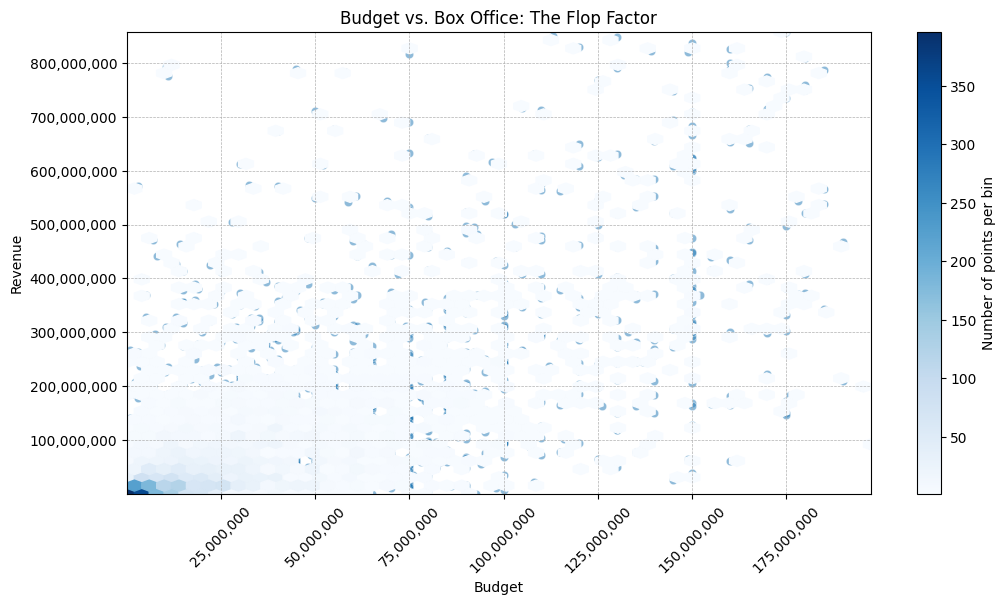

In [505]:
#convert budget and revenue columns to numeric, coercing errors to nan
movies_meta['budget'] = pd.to_numeric(movies_meta['budget'],
errors='coerce')
movies_meta['revenue'] = pd.to_numeric(movies_meta['revenue'],
errors='coerce')
#Identify and remove non-finite and near-zero values
movies_meta = movies_meta[np.isfinite(movies_meta['budget']) &
np.isfinite(movies_meta['revenue'])]
movies_meta = movies_meta[(movies_meta['budget'] > 10000) & (movies_meta['revenue'] > 10000)]
# cap the extreme outliers with percentages
movies_meta = movies_meta[(movies_meta['budget'] <
movies_meta['budget'].quantile(0.99)) & 
                          (movies_meta['revenue']<
movies_meta['revenue'].quantile(0.99))] 
                
#create a scatter plot with a density heatmap overlay
plt.figure(figsize=(12,6))
sns.scatterplot(x='budget', y='revenue', data=movies_meta, alpha=0.5)

#create a 2d histogram for density
hb = plt.hexbin(movies_meta['budget'], movies_meta['revenue'], gridsize=50,
cmap='Blues', mincnt=1)
cb = plt.colorbar(hb, label='Number of points per bin')
                           
#set the axis limits to show the full range
plt.xlim(movies_meta['budget'].min(), movies_meta['budget'].max())
plt.ylim(movies_meta['revenue'].min(), movies_meta['revenue'].max())

#format the axes limits to show full range
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:
f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _:
f'{y:,.0f}'))
                           
# Rotate x-axis labels so you can see them 
plt.xticks(rotation=45)
                           
# Add grid lines so you can see better
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Budget vs. Box Office: The Flop Factor')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()
                           


        
                        

In [ ]:
#cap extreme outliers using percentages
movies_meta = movies_meta[(movies_meta['budget'] < 
movies_meta['budget'].quantile(0.99)) &
                             (movies_meta['revenue'] <
movies_meta['revenue'].quantile(0.99))]

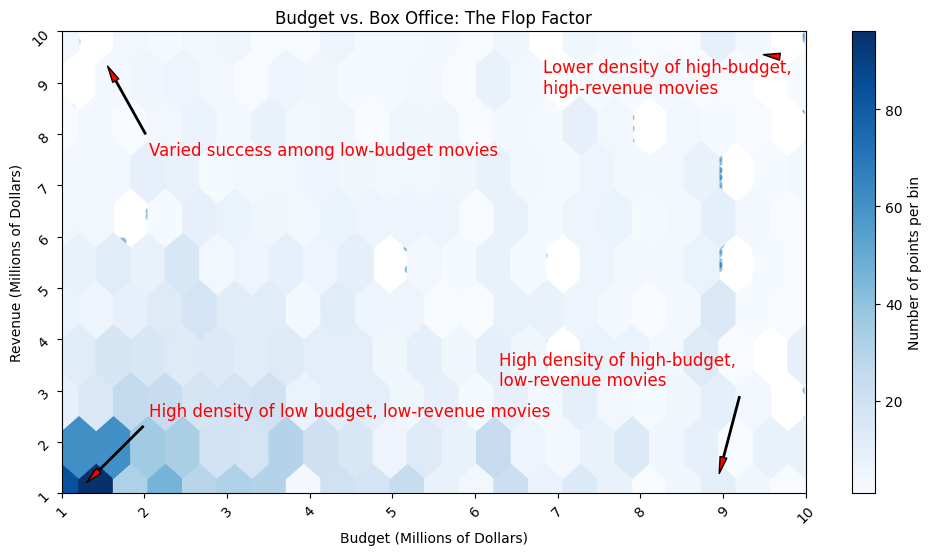

In [509]:
# create a scatter plot with a density heatmap overlay
plt.figure(figsize=(12,6))
sns.scatterplot(x='budget', y='revenue', data=movies_meta, alpha=0.5)

#create a 2d histogram for density
hb= plt.hexbin(movies_meta['budget'], movies_meta['revenue'], gridsize=250,
cmap='Blues', mincnt=1)
cb = plt.colorbar(hb, label='Number of points per bin') 

# Set the axis limits to zoom in more closely
budget_min, budget_max = movies_meta['budget'].quantile([0.0, 0.5])
revenue_min, revenue_max = movies_meta['revenue'].quantile([0.0, 0.5])
plt.xlim(budget_min, budget_max)
plt.ylim(revenue_min, revenue_max)

# Format the axes to use regular numbers
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e6:.0f}M'))

# Rotate x-axis labels for better readability and set ticks from 1 to 10
plt.xticks(ticks=np.linspace(budget_min, budget_max, 10), labels=np.arange(1, 11), rotation=45)
plt.yticks(ticks=np.linspace(revenue_min, revenue_max, 10), labels=np.arange(1, 11), rotation=45)

#Add grid lines for better viewing
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



# Add annotation with arrow
annotations = [
    {'text': 'High density of low budget, low-revenue movies', 'xy': (budget_min + 0.5e6, revenue_min + 0.5e6), 'xytext': (budget_min + 2e6, revenue_min + 5e6)},
    {'text': 'High density of high-budget, \nlow-revenue movies', 'xy': (budget_max - 2e6, revenue_min + 1e6), 'xytext': (budget_max - 7e6, revenue_min + 7e6)},
    {'text': 'Lower density of high-budget,\nhigh-revenue movies', 'xy': (budget_max - 1e6, revenue_max - 1.5e6), 'xytext': (budget_max - 6e6, revenue_max - 4e6)},  # Adjusted this line
    {'text': 'Varied success among low-budget movies', 'xy': (budget_min + 1e6, revenue_max - 2e6), 'xytext': (budget_min + 2e6, revenue_max - 8e6)}
]

for ann in annotations:
    plt.annotate(ann['text'],
                 xy=ann['xy'],
                 xytext=ann['xytext'],
                 arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5),
                 fontsize=12, color='red')
plt.title("Budget vs. Box Office: The Flop Factor")
plt.xlabel('Budget (Millions of Dollars)')
plt.ylabel('Revenue (Millions of Dollars)')
plt.grid(None)
plt.show()

### Budget vs Box Office: The Flop Factor
### Comprehensive View
### Description:

This plot includes all data, providing a comprehensive view of all movies regardless of budget or revenue.
Distribution: The budget ranges from 0 to over $150,000,000, and the revenue ranges from 0 to over $600,000,000.
Density: There is a high density of data at the lower budget and revenue ends, indicating that movies tend to have smaller budgets and revenues. There are significant outliers with very high budgets and revenues.

### 50 percent of data
Description:

This plot focuses on the middle 50% of the data, highlighting movies with moderate budgets and revenues.
Distribution: The majority of movies in this range have budgets and revenues between $4,000,000 and $20,000,000.
Density: The highest density of data is around the lower end of this range, indicating that most movies in the middle 50% of budgets have relatively lower revenues.

### Inferences
### Comprehensive View:

There is a high density of movies at the lower end of the budget and revenue spectrum. This suggests that most movies tend to have smaller budgets and revenues.
Significant outliers with very high budgets and revenues indicate that while most movies do not have high budgets or revenues, a few outliers can significantly affect the overall figures.

### 50 percent of data

There is a high density of movies in the lower end of the budget and revenue spectrum within this middle range. This suggests that moderate-budget movies can still achieve decent revenue, although they are less likely to achieve very high revenues.
Most movies in the 20th-60th percentile range have budgets and revenues between $4,000,000 and $20,000,000, with the highest density around the lower end of this range.

### Color Representation in the Density Heatmap

### Dark Blue:

### Represents areas with low density.
Few movies fall in these budget and revenue ranges.
These bins have the lowest number of data points.

### Light Blue:

### Represents areas with medium-low density.
More movies fall in these budget and revenue ranges compared to dark blue.
These bins have more data than dark blue but less than medium and high-density areas.

### Medium Blue:

### Represents areas with medium density.
A significant number of movies fall in these budget and revenue ranges.
These bins have more data than light blue but less than high-density areas.

### White:

### Represents areas with high density.
Many movies fall in these budget and revenue ranges.
These bins have the highest number of data points.


### Hexbin Plot explained
A hexbin plot divides the data into hexagonal-shaped bins to show density. 
Each hexagon's color represents the number of data points within that bin, 
with darker colors indicating fewer points and lighter colors indicating more points. 
This type of plot helps visualize where data points are concentrated, making patterns 
easier to see, especially in large datasets. It's useful for identifying common budget-revenue 
combinations and spotting trends in movie production and investment.

### Hollywood Titans

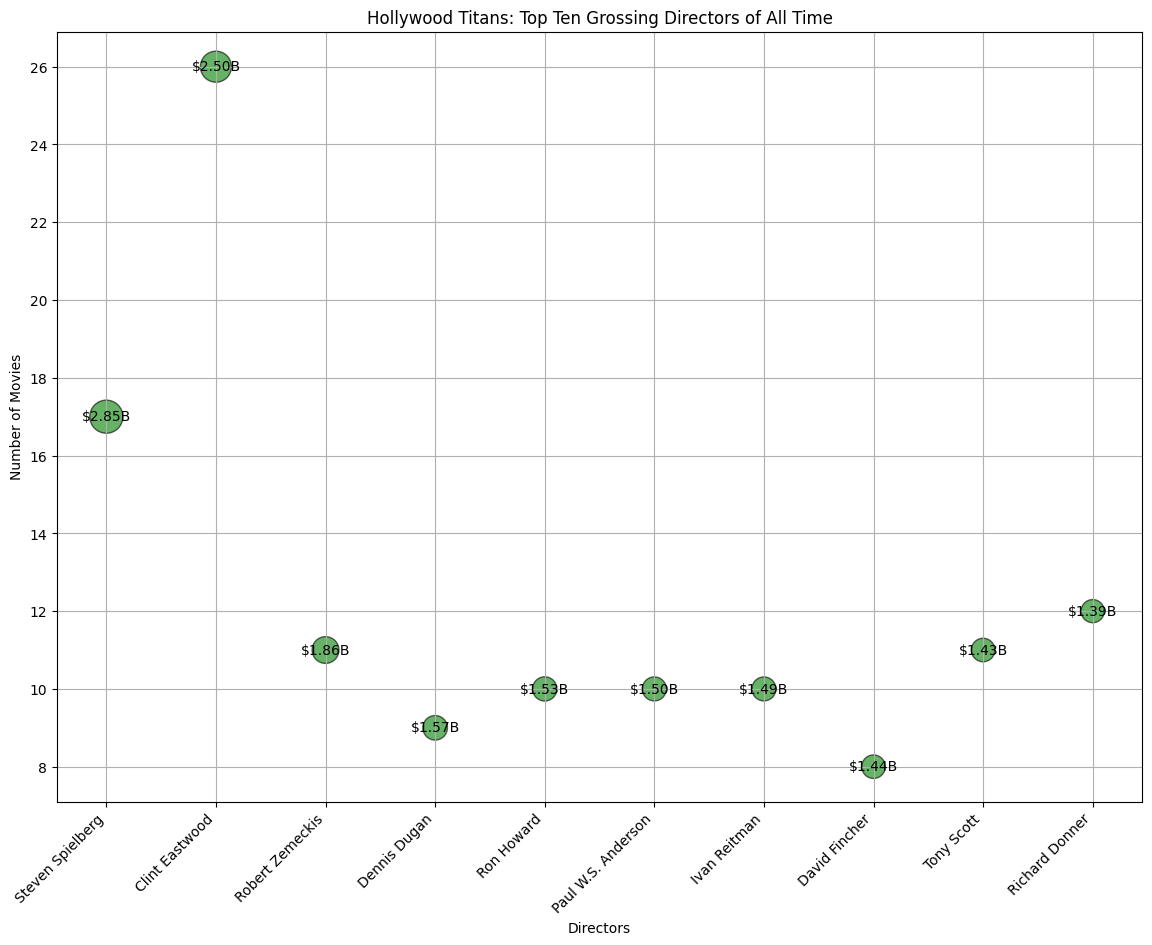

In [514]:
data = {
    'name': [
        'Steven Spielberg', 'Clint Eastwood', 'Robert Zemeckis', 
        'Dennis Dugan', 'Ron Howard', 'Paul W.S. Anderson', 
        'Ivan Reitman', 'David Fincher', 'Tony Scott', 'Richard Donner'
    ],
    'revenue': [
        2846889000, 2502757000, 1862972000, 1566034000, 1526200000, 
        1496273000, 1490467000, 1436084000, 1433186000, 1392407000
    ],
    'movie_count': [17, 26, 11, 9, 10, 10, 10, 8, 11, 12]
}

# Convert to DataFrame
top_10_directors = pd.DataFrame(data)

# Plot the bubble chart
plt.figure(figsize=(14, 10))

# Bubble chart 
plt.scatter(
    top_10_directors['name'],
    top_10_directors['movie_count'],
    s=top_10_directors['revenue'] / 5e6,  # Increased bubble size
    alpha=0.6,
    c='green',  # Set all bubbles to green
    edgecolors="black",  # Adding edge color to bubbles
    linewidth=1  # Line width of edge color
)

# Adding labels to each bubble
for i in range(len(top_10_directors)):
    plt.text(
        top_10_directors['name'][i],
        top_10_directors['movie_count'][i],
        f"${top_10_directors['revenue'][i] / 1e9:.2f}B",
        fontsize=10,
        ha='center',
        va='center',
        color='black'
    )

plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.title('Hollywood Titans: Top Ten Grossing Directors of All Time')

plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Set the y-axis to integer values only
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


### Productivity vs. Commercial Success: 
Directors like Steven Spielberg and Clint Eastwood not only have directed
a high number of movies but also achieved substantial box office revenues, indicating their strong market
presence and consistent performance.
### Revenue Per Movie: 
Comparing directors total revenue with the number of movies they directed can give insights 
into their average revenue per movie. For example, Steven Spielbergs higher revenue with fewer movies compared
to Clint Eastwood suggests Spielbergs movies may have higher average earnings.
Trend Identification: By looking at the bubble size and the number of movies, you can identify trends in the filmmaking
industry. Directors with larger bubbles but fewer movies may focus on big-budget, high-revenue projects.

### Billion Dollar Club

                     name  movie_count  total_revenue
7264         Bruce Willis           51   4.731605e+09
51653  Sylvester Stallone           46   4.613544e+09
45882      Robert De Niro           58   4.597862e+09
39383      Morgan Freeman           44   4.417661e+09
6375            Brad Pitt           38   4.103392e+09
361          Adam Sandler           27   3.944994e+09
48003   Samuel L. Jackson           47   3.852370e+09
36481          Matt Damon           42   3.796899e+09
28483       Julia Roberts           33   3.723125e+09
53370          Tom Cruise           26   3.705602e+09


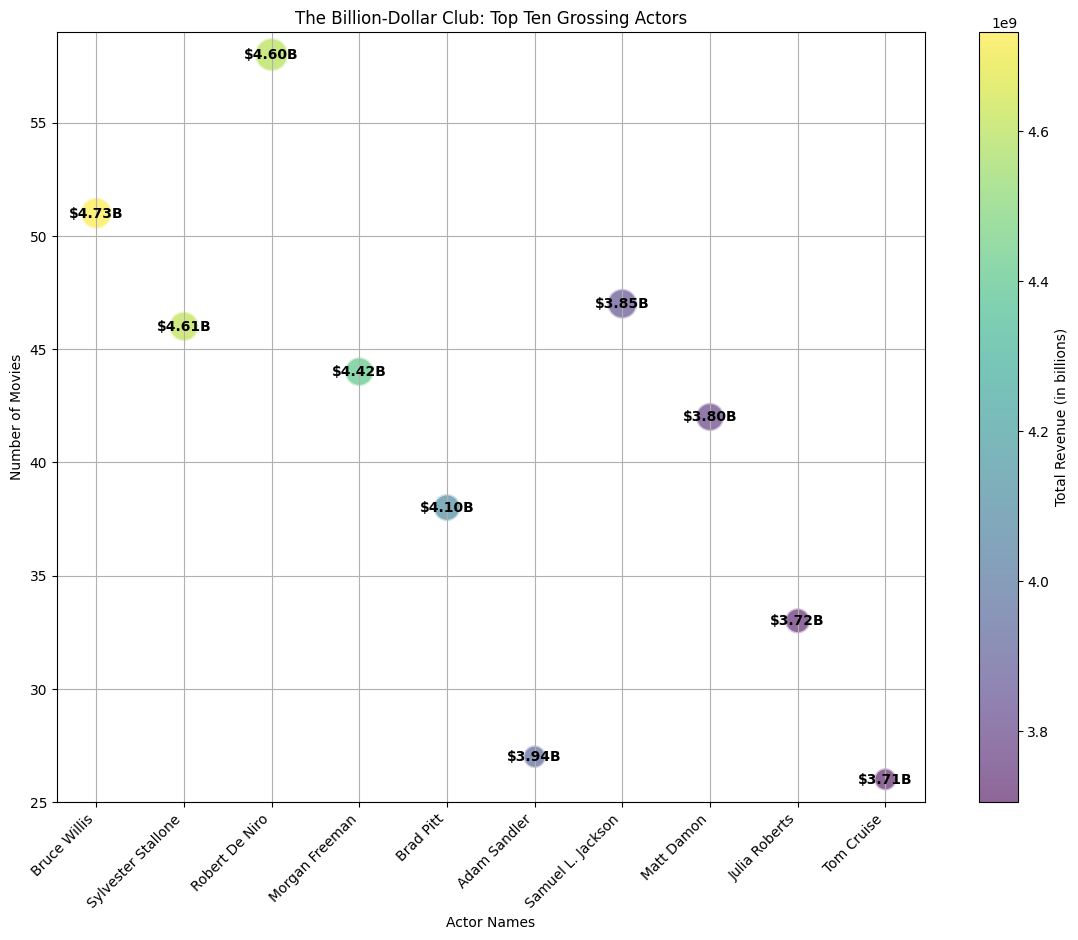

In [519]:
# Define the file paths (please update these paths to your actual file locations)
actors_file_path = '/Users/xTRUxDesigns/Desktop/all_casts.csv'
movies_meta_file_path = '/Users/xTRUxDesigns/Desktop/movies_meta.csv'

# Load the datasets
actors_df = pd.read_csv(actors_file_path)
movies_meta_df = pd.read_csv(movies_meta_file_path)

# Convert the production_id and id columns to strings
actors_df['production_id'] = actors_df['production_id'].astype(str)
movies_meta_df['id'] = movies_meta_df['id'].astype(str)

# Merge the filtered DataFrame with movies_meta DataFrame
actors_movies = pd.merge(actors_df, movies_meta_df, left_on='production_id', right_on='id')

# Check for any missing or invalid revenue data and filter it out
actors_movies = actors_movies[actors_movies['revenue'].notna() & (actors_movies['revenue'] > 0)]

# Group by actor name to count the number of movies and sum the total revenue
actor_stats = actors_movies.groupby('name').agg(
    movie_count=('id', 'size'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Get the top 10 highest grossing actors
top_actors = actor_stats.nlargest(10, 'total_revenue')

# Verify the top actors
print(top_actors)

# Create a bubble chart
plt.figure(figsize=(14, 10))
bubble = plt.scatter(
    top_actors['name'],
    top_actors['movie_count'],
    s=top_actors['movie_count'] * 10,  # Adjust bubble size for better visualization
    c=top_actors['total_revenue'],
    cmap='viridis',
    alpha=0.6,
    edgecolors="w",
    linewidth=2
)

# Add labels inside each bubble
for i in range(top_actors.shape[0]):
    plt.text(
        top_actors['name'].iloc[i],
        top_actors['movie_count'].iloc[i],
        f"${top_actors['total_revenue'].iloc[i] / 1e9:.2f}B",
        fontsize=10,
        ha='center',
        va='center',
        color='black',
        weight='bold'
    )

# Add color bar
cbar = plt.colorbar(bubble)
cbar.set_label('Total Revenue (in billions)')

# Set the labels and title
plt.xlabel('Actor Names')
plt.ylabel('Number of Movies')
plt.title('The Billion-Dollar Club: Top Ten Grossing Actors')

# Rotate the actor names for better viewing
plt.xticks(rotation=45, ha='right')
plt.grid(True)
# Adjust y-axis to start from a more appropriate point for better readability
plt.ylim(ymin=max(0, top_actors['movie_count'].min() - 1), ymax=top_actors['movie_count'].max() + 1)

# Show the plot
plt.show()


### High Grossing Actors:

The highest grossing actor in the provided chart is Bruce Willis, with a total revenue of $4.73 billion.
Sylvester Stallone follows closely with a revenue of $4.61 billion.
Both these actors also have the highest number of movies, indicating a correlation between the number of movies and
total revenue.

### Revenue Distribution:

The total revenue for most actors falls within the range of $3.7 billion to $4.8 billion.
There is a relatively even distribution of revenue among the top ten actors, with no single actor dominating the box 
office by a large margin.

### Visual Differences:

The first chart uses a color gradient to represent total revenue, ranging from $3.8 billion to $4.4 billion.
The second chart includes a title, "The Billion-Dollar Club: Top Ten Grossing Actors," and a slightly different
color gradient for total revenue.

### Key Insights:

Actors who have a prolific career with numerous movies tend to accumulate higher total revenue.
The bubble chart effectively visualizes the relationship between the number of movies and total revenue, 
allowing for quick identification of the most commercially successful actors.
While there is a clear trend, some actors with fewer movies (e.g., Matt Damon, Tom Cruise) still
manage to achieve significant revenue, suggesting that factors other than the number of movies 
(such as the success of individual films) also play a crucial role.


### Top 10 Grossing Movies

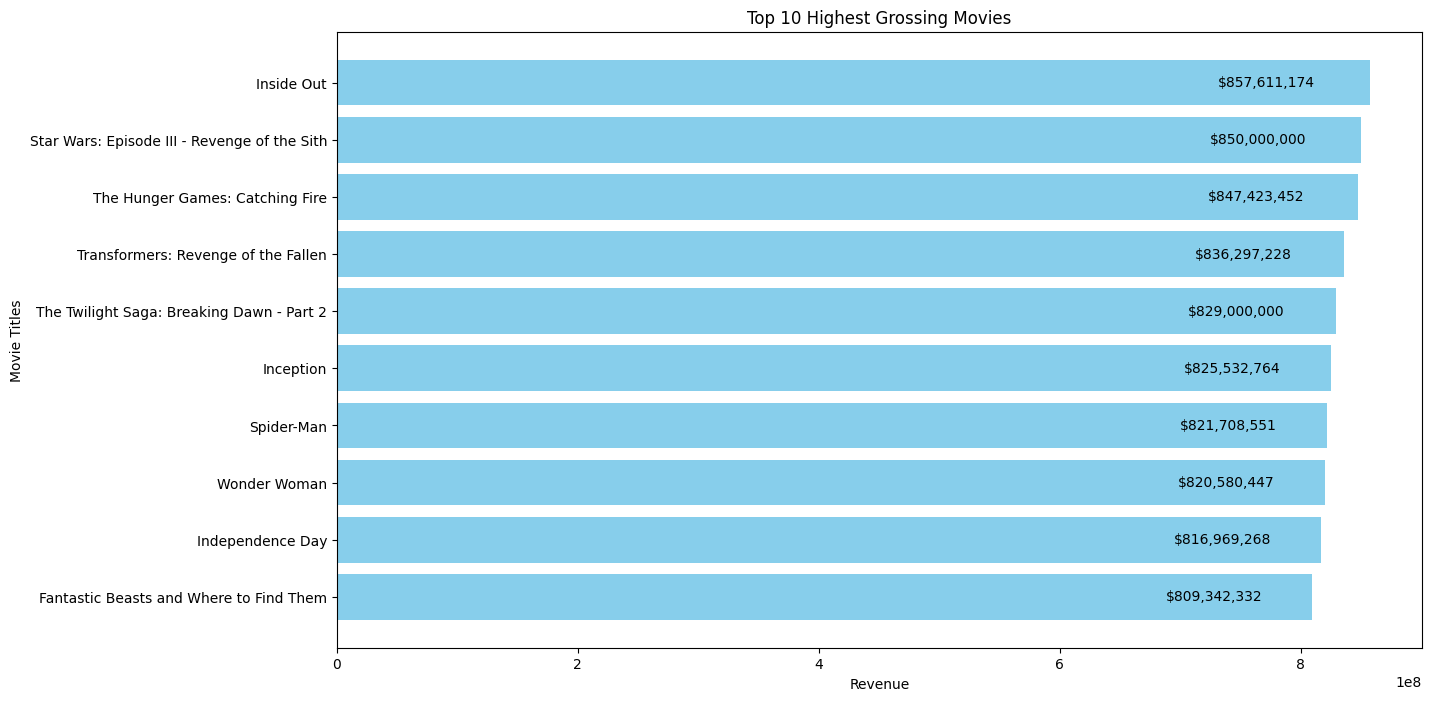

In [522]:


# Sort movies by revenue and select the top 10 movies
top_movies = movies_meta.nlargest(10, 'revenue')[['original_title', 'revenue']]

# Create a horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(top_movies['original_title'], top_movies['revenue'], color='skyblue')

# Add labels and title
plt.xlabel('Revenue')
plt.ylabel('Movie Titles')
plt.title('Top 10 Highest Grossing Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue on top

# Add the exact revenue value inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width - (width * 0.1), bar.get_y() + bar.get_height()/2, f'${width:,.0f}', va='center', ha='center', color='black')

# Show the plot
plt.show()

### Cinema Buzzwords

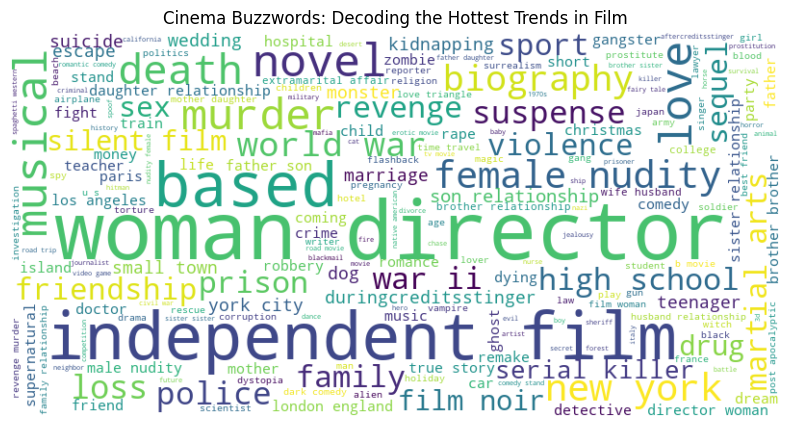

In [525]:
from wordcloud import WordCloud

# Define the file path
file_path7 = '/Users/xTRUxDesigns/Desktop/all_keywords.csv'

# Load the CSV file
all_keywords = pd.read_csv(file_path7)

# Extract keywords column
keywords = all_keywords['name'].dropna()

# Join all keywords into a single string
all_keywords_text = ' '.join(keywords)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cinema Buzzwords: Decoding the Hottest Trends in Film')
plt.show()

### Prominent Themes and Genres:

High-grossing movies often feature strong character roles and professions
(e.g., "woman," "police") and popular genres and styles (e.g., "biography," "musical").
Narrative and Emotional Elements:

Common keywords highlight prevalent narrative elements (e.g., "love," "murder")
and emotional themes (e.g., "family," "loss") that resonate with audiences.

### Revenue By Genre

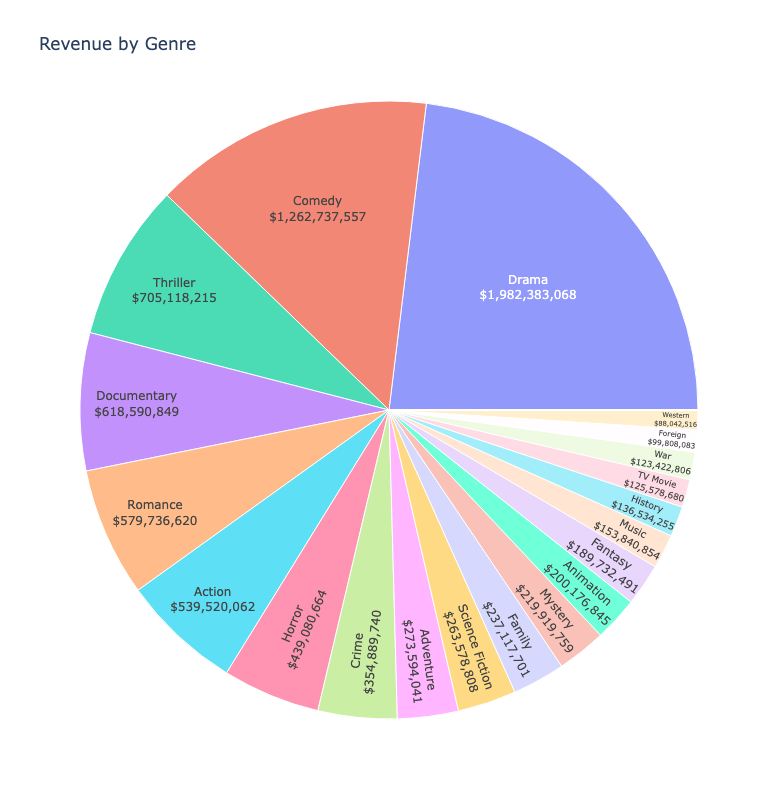

In [528]:
# Load the data from the uploaded CSV file
file_path9 = '/Users/xTRUxDesigns/Desktop/super_genre (1).csv'
genre_revenue = pd.read_csv(file_path9)

# Convert the 'production_id' column to numeric
genre_revenue['production_id'] = pd.to_numeric(genre_revenue['production_id'], errors='coerce')

# Create the sunburst chart using the correct columns
fig = px.sunburst(genre_revenue, 
                  path=['name'], 
                  values='production_id', 
                  title='Revenue by Genre',
                  width=800, 
                  height=800)

# Update the text info
fig.update_traces(textinfo='label+value', texttemplate='%{label}<br>$%{value:,.0f}')

# Show the chart
fig.show()

### Total Revenue Trends Over Time

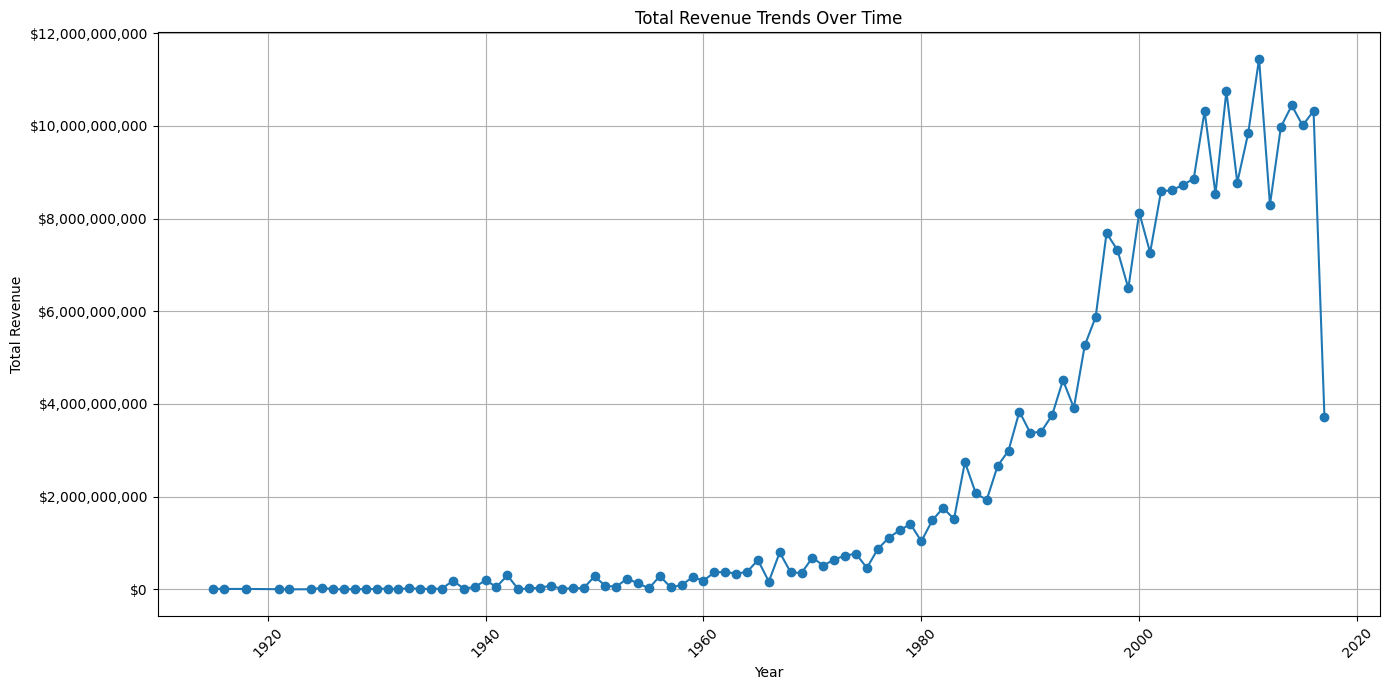

In [531]:
# Load the data from the uploaded CSV file
file_path3 = '/Users/xTRUxDesigns/Desktop/movies_meta.csv'
movies_meta = pd.read_csv(file_path3)

# Convert the 'release_date' column to datetime
movies_meta['release_date'] = pd.to_datetime(movies_meta['release_date'], errors='coerce')

# Extract the year from the 'release_date' column
movies_meta['release_year'] = movies_meta['release_date'].dt.year

# Group by 'release_year' and sum the 'revenue'
yearly_revenue = movies_meta.groupby('release_year')['revenue'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(yearly_revenue['release_year'], yearly_revenue['revenue'], marker='o')

# Make y-axis show actual numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.title('Total Revenue Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

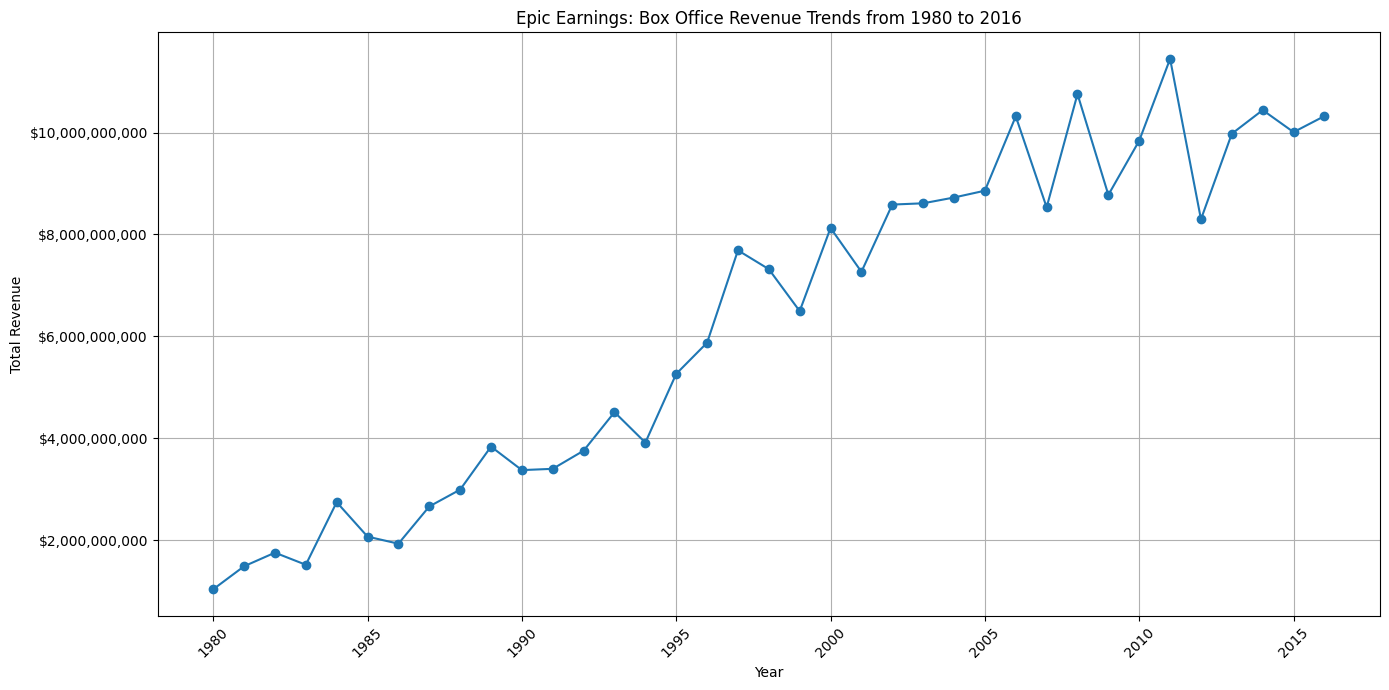

In [534]:
# Load the data from the uploaded CSV file
file_path4 = '/Users/xTRUxDesigns/Desktop/movies_meta.csv'
movies_meta = pd.read_csv(file_path4)

# Convert the 'release_date' column to datetime
movies_meta['release_date'] = pd.to_datetime(movies_meta['release_date'], errors='coerce')

# Extract the year from the 'release_date' column
movies_meta['release_year'] = movies_meta['release_date'].dt.year

# Group by 'release_year' and sum the 'revenue'
yearly_revenue = movies_meta.groupby('release_year')['revenue'].sum().reset_index()

# Filter the data for years between 1980 and 2016
yearly_revenue_filtered = yearly_revenue[(yearly_revenue['release_year'] >= 1980) & (yearly_revenue['release_year'] <= 2016)]

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(yearly_revenue_filtered['release_year'], yearly_revenue_filtered['revenue'], marker='o')

# Make y-axis show actual numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.title('Epic Earnings: Box Office Revenue Trends from 1980 to 2016')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consistent Upward Trend: The overall box office revenue shows a steady increase 
from 1980 to 2016, indicating significant growth in the movie industry over this period.

Significant Fluctuations: Despite the upward trend, there are notable fluctuations, 
particularly around the late 1990s and early 2000s, which could be due to various factors
such as blockbuster releases or economic conditions.

Recent Plateau: In the mid-2010s, the revenue appears to plateau, suggesting potential market
saturation or the impact of alternative entertainment options like streaming services.

### Inferential Data Analysis

Two-Sample Z-Test for Means
Z-score: 1.6394789028977137
P-value: 0.10111356090445527


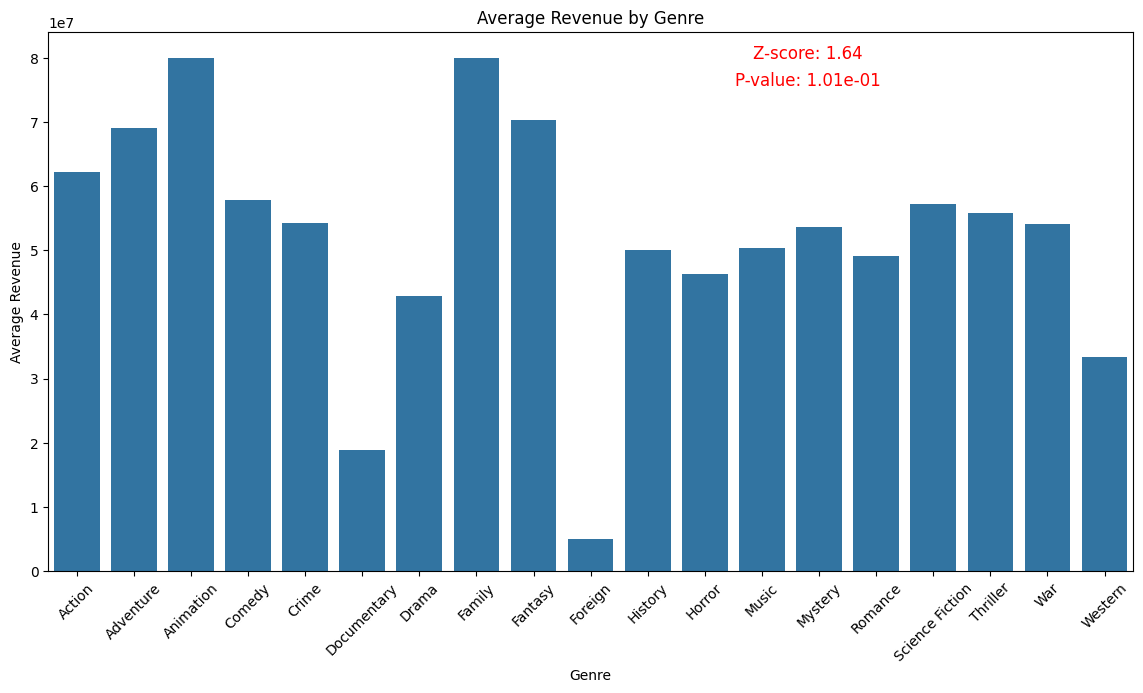

In [560]:
# File paths
file_path_movies_meta = '/Users/xTRUxDesigns/Desktop/movies_meta.csv'
file_path_super_genre = '/Users/xTRUxDesigns/Desktop/super_genre (1).csv'

# Load the datasets
movies_meta = pd.read_csv(file_path_movies_meta)
super_genre = pd.read_csv(file_path_super_genre)

# Ensure both 'id' and 'production_id' columns are of the same data type
movies_meta['id'] = movies_meta['id'].astype(str)
super_genre['production_id'] = super_genre['production_id'].astype(str)

# Merge datasets to get the genre information in movies_meta
movies_meta = movies_meta.merge(super_genre, left_on='id', right_on='production_id', how='left')

# Rename the 'name' column to 'genre' for clarity
movies_meta.rename(columns={'name': 'genre'}, inplace=True)

# Group by genre and calculate mean and standard deviation of revenue
genre_stats = movies_meta.groupby('genre')['revenue'].agg(['mean', 'std', 'count']).dropna()

# Perform Two-Sample Z-Test for Means between Action and Comedy
genre1 = 'Action'
genre2 = 'Comedy'

if genre1 in genre_stats.index and genre2 in genre_stats.index:
    mean1, std1, n1 = genre_stats.loc[genre1]
    mean2, std2, n2 = genre_stats.loc[genre2]

    z_score_means = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    p_value_means = stats.norm.sf(abs(z_score_means)) * 2  # two-tailed test

    print(f"Two-Sample Z-Test for Means\nZ-score: {z_score_means}\nP-value: {p_value_means}")

    # Visualization: Bar Plot for Average Revenue by Genre
    plt.figure(figsize=(14, 7))
    sns.barplot(x=genre_stats.index, y='mean', data=genre_stats)
    plt.title('Average Revenue by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Revenue')
    plt.xticks(rotation=45)
    plt.annotate(f'Z-score: {z_score_means:.2f}', xy=(0.7, 0.95), xycoords='axes fraction', ha='center', fontsize=12, color='red')
    plt.annotate(f'P-value: {p_value_means:.2e}', xy=(0.7, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
    plt.show()
else:
    print(f"One of the genres '{genre1}' or '{genre2}' is not present in the data.")


Bar Plot for Average Revenue by Genre
Description:
This bar plot visualizes the average revenue generated by movies across different genres. Each bar represents the mean revenue for a particular genre. The heights of the bars allow for an easy comparison of the average revenues.

Inference:

The plot shows which genres tend to generate higher or lower average revenues.
For instance, if the bar for Action movies is higher than the bar for Comedy movies, it indicates that Action movies tend to generate more revenue on average.
Annotations for the Z-score and P-value highlight the statistical significance of the difference in mean revenues between Action and Comedy movies.

Two-Sample Z-Test for Proportions
Z-score: 0.8469380358601927
P-value: 0.39702966034834075


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/anaconda3/lib/python3.11/site-

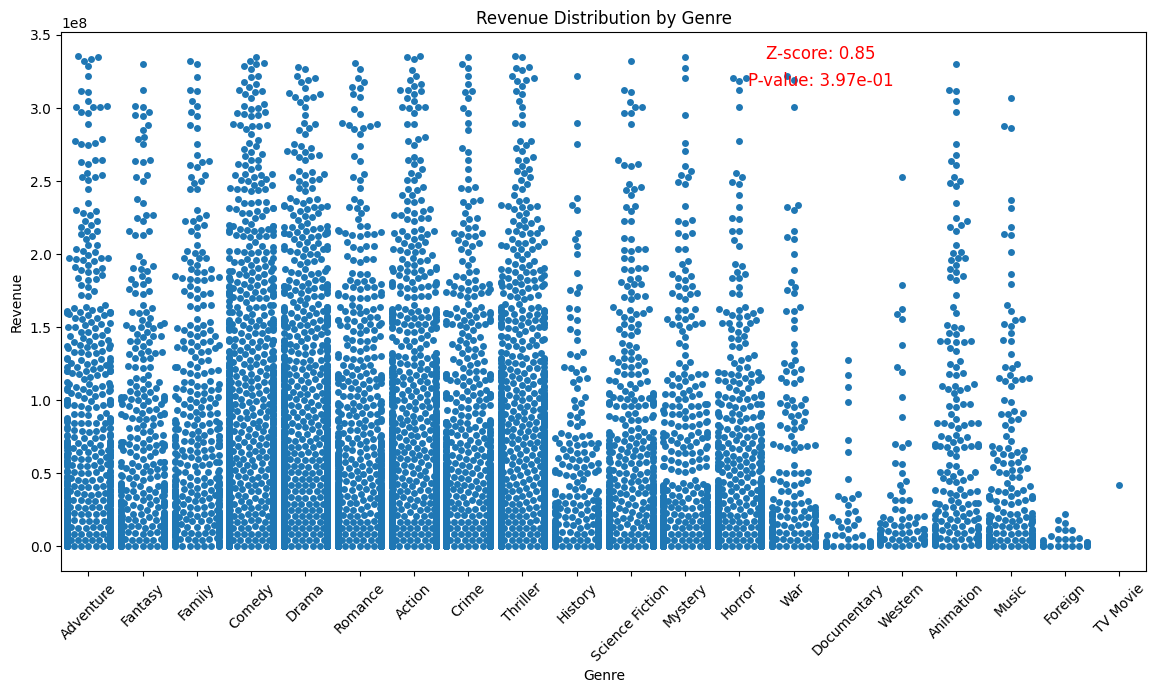

In [562]:
# Define high-grossing revenue threshold
high_grossing_threshold = 1e8  # 100 million

# Calculate proportions of high-grossing movies for Action and Comedy
action_high_grossing = movies_meta[(movies_meta['genre'] == genre1) & (movies_meta['revenue'] > high_grossing_threshold)].shape[0]
action_total = movies_meta[movies_meta['genre'] == genre1].shape[0]
proportion_action = action_high_grossing / action_total

comedy_high_grossing = movies_meta[(movies_meta['genre'] == genre2) & (movies_meta['revenue'] > high_grossing_threshold)].shape[0]
comedy_total = movies_meta[movies_meta['genre'] == genre2].shape[0]
proportion_comedy = comedy_high_grossing / comedy_total

# Calculate the pooled proportion and the Z-score for proportions
pooled_proportion = (action_high_grossing + comedy_high_grossing) / (action_total + comedy_total)
z_score_proportions = (proportion_action - proportion_comedy) / np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1 / action_total + 1 / comedy_total))
p_value_proportions = stats.norm.sf(abs(z_score_proportions)) * 2  # two-tailed test

print(f"Two-Sample Z-Test for Proportions\nZ-score: {z_score_proportions}\nP-value: {p_value_proportions}")

# Visualization: Swarm Plot for Revenue Distribution by Genre
plt.figure(figsize=(14, 7))
sns.swarmplot(x='genre', y='revenue', data=movies_meta, size=5)
plt.title('Revenue Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.annotate(f'Z-score: {z_score_proportions:.2f}', xy=(0.7, 0.95), xycoords='axes fraction', ha='center', fontsize=12, color='red')
plt.annotate(f'P-value: {p_value_proportions:.2e}', xy=(0.7, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
plt.show()


Swarm Plot for Revenue Distribution by Genre
Description:
This swarm plot shows the distribution of individual movie revenues within each genre. Each point represents a movie’s revenue. The points are spread out within each genre to avoid overlap, providing a clear view of the revenue distribution and any outliers.

Inference:

The plot provides detailed insights into how revenues vary within each genre.
Clusters of points indicate common revenue levels, while isolated points represent outliers.
Annotations for the Z-score and P-value help contextualize the distributions with the results of the statistical test, indicating whether the observed differences are statistically significant.

One-Sample Z-Test for Action Movies
Z-score: 5.834650756174741
P-value: 5.390335185958355e-09


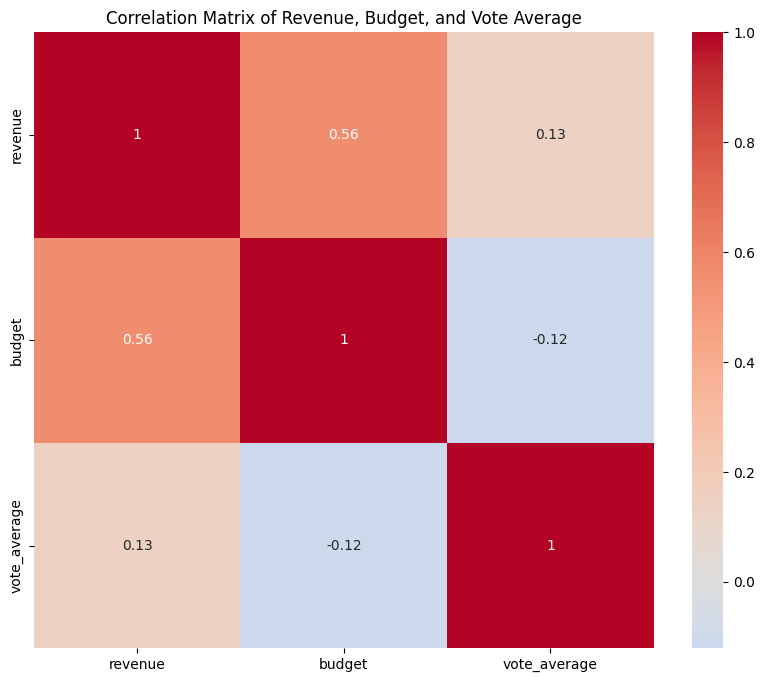

In [564]:
# Define hypothesized population mean revenue
hypothesized_mean = 5e7  # 50 million

# Perform One-Sample Z-Test for Action movies
if genre1 in genre_stats.index:
    mean_action = genre_stats.loc[genre1, 'mean']
    std_action = genre_stats.loc[genre1, 'std']
    n_action = genre_stats.loc[genre1, 'count']

    z_score_one_sample = (mean_action - hypothesized_mean) / (std_action / np.sqrt(n_action))
    p_value_one_sample = stats.norm.sf(abs(z_score_one_sample)) * 2  # two-tailed test

    print(f"One-Sample Z-Test for Action Movies\nZ-score: {z_score_one_sample}\nP-value: {p_value_one_sample}")

    # Visualization: Annotated Heatmap for Correlation between Revenue, Budget, and Vote Average
    plt.figure(figsize=(10, 8))
    correlation_matrix = movies_meta[['revenue', 'budget', 'vote_average']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Revenue, Budget, and Vote Average')
    plt.show()
else:
    print(f"Genre '{genre1}' is not present in the data.")


Annotated Heatmap for Correlation between Revenue, Budget, and Vote Average
Description:
This annotated heatmap visualizes the correlation between different movie metrics: revenue, budget, and vote average. The color intensity and the annotated values represent the strength and direction of the correlations. A positive correlation indicates that as one metric increases, the other also increases, while a negative correlation indicates an inverse relationship.

Inference:

The heatmap helps identify how different metrics are related to each other.
For example, a high positive correlation between budget and revenue suggests that movies with higher budgets tend to generate more revenue.
The annotations provide exact correlation values, making it easier to interpret the relationships between metrics.